In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Task 1.1: Using OpenCV, apply the appropriate blurring method on the following image, then show the original and blurred images.


(<matplotlib.image.AxesImage at 0x16c4378ecf0>, Text(0.5, 1.0, 'Blur'))

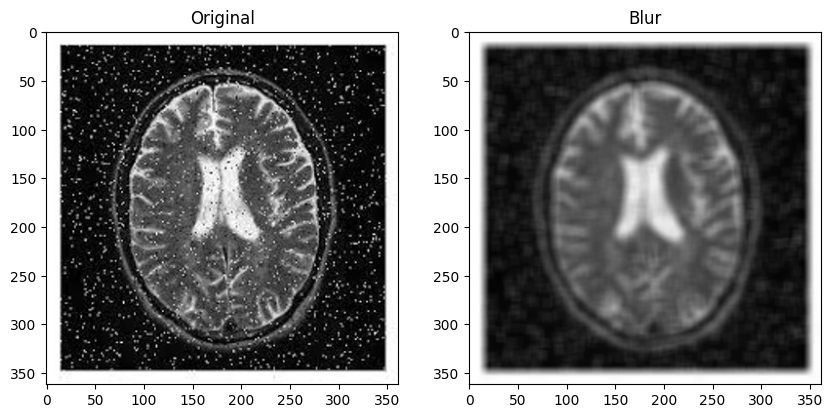

In [2]:
# average
img = cv2.imread('Picture1.jpg')
blr = cv2.blur(img, (10, 10))

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,7))
ax0.imshow(img), ax0.set_title('Original')
ax1.imshow(blr), ax1.set_title('Blur')

(<matplotlib.image.AxesImage at 0x16c43939010>, Text(0.5, 1.0, 'bilateral'))

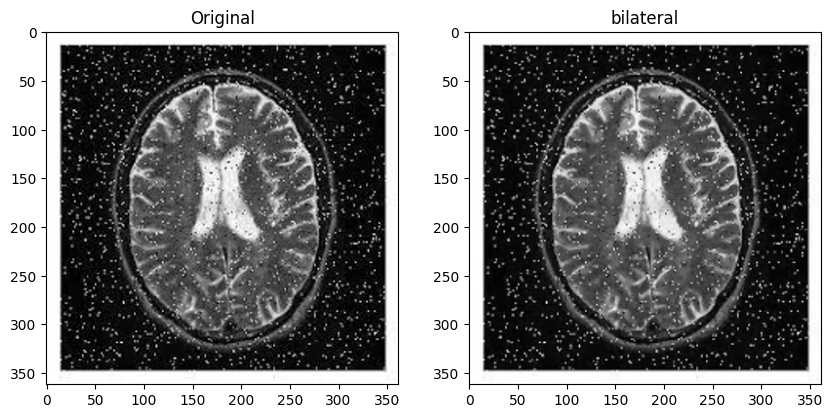

In [3]:
#bilateralFilter
bilateral = cv2.bilateralFilter(img,5,35,25)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,7))
ax0.imshow(img), ax0.set_title('Original')
ax1.imshow(bilateral), ax1.set_title('bilateral')

(<matplotlib.image.AxesImage at 0x16c46d10bf0>, Text(0.5, 1.0, 'median'))

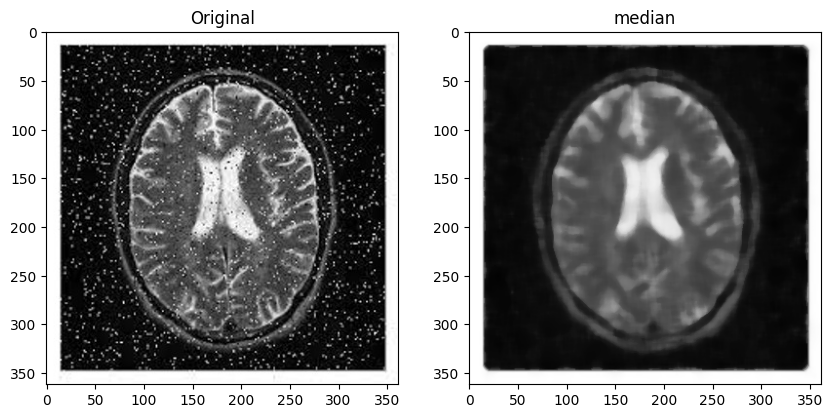

In [4]:
# medianBlur
median = cv2.medianBlur(img, 11)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,7))
ax0.imshow(img), ax0.set_title('Original')
ax1.imshow(median), ax1.set_title('median')

(<matplotlib.image.AxesImage at 0x16c46d957c0>, Text(0.5, 1.0, 'gaussian'))

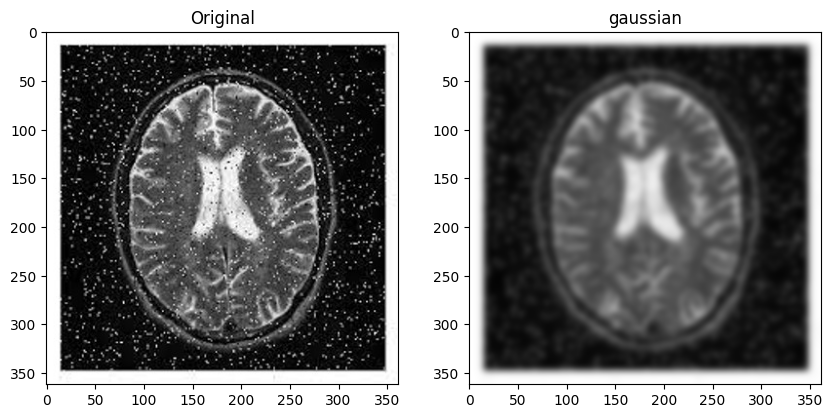

In [5]:
# gaussian 
gaussian = cv2.GaussianBlur(img, (21,21), 0)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,7))
ax0.imshow(img), ax0.set_title('Original')
ax1.imshow(gaussian), ax1.set_title('gaussian')

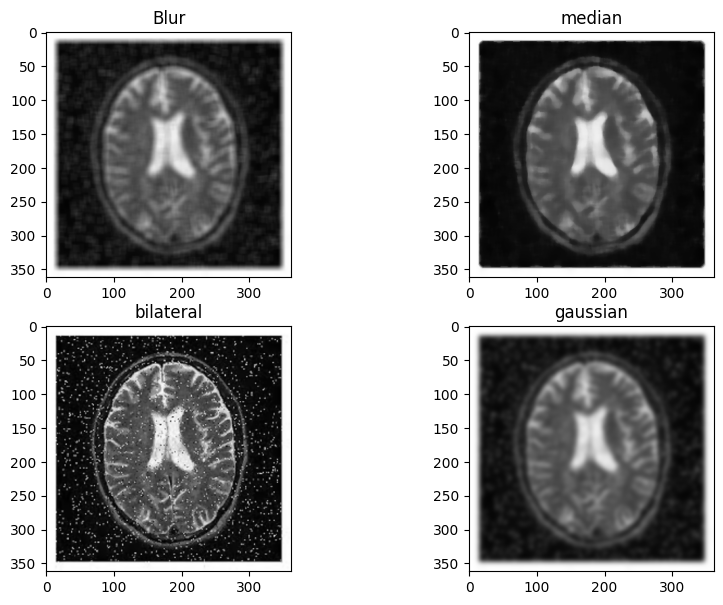

In [6]:
f, ax = plt.subplots(2, 2, figsize=(10,7))
ax[0][0].imshow(blr), ax[0][0].set_title('Blur')
ax[1][0].imshow(bilateral), ax[1][0].set_title('bilateral');
ax[0][1].imshow(median), ax[0][1].set_title('median');
ax[1][1].imshow(gaussian), ax[1][1].set_title('gaussian');

### Task 1.2: Using OpenCV, apply canny edge detector on the following image, then show the original image and the result.


In [2]:
img2 =cv2.imread('Picture2.jpg')


(<matplotlib.image.AxesImage at 0x28be1214f50>, Text(0.5, 1.0, 'canny'))

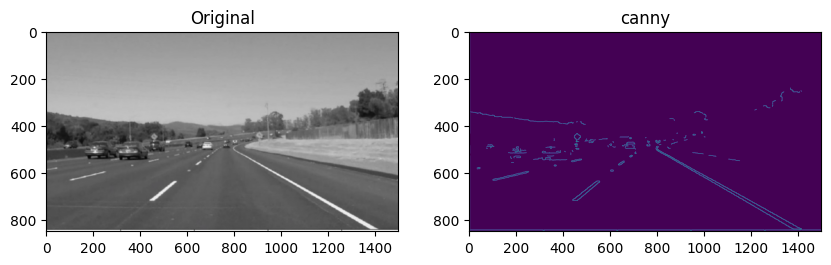

In [22]:
canny = cv2.Canny(img2, 125, 175)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,7))
ax0.imshow(img2), ax0.set_title('Original')
ax1.imshow(canny), ax1.set_title('canny')


In [3]:
canny = cv2.Canny(img2, 125, 175)
cv2.imshow("orignal", img2)
cv2.imshow("canny", canny)
cv2.waitKey(0)

-1

### Task 1.3:Using OpenCV, apply perspective transformation on the following image, then show the original and the transformed images.


In [3]:
img3 = cv2.imread('Picture3.jpg')

In [4]:

def callback (events,x,y,flag,param):
    if events == cv2.EVENT_LBUTTONDBLCLK:
        print (x,y)

cv2.namedWindow('image')
cv2.setMouseCallback('image',callback)


while 1:
    cv2.imshow('image',img3)
    k=cv2.waitKey(0)
    if k== ord('q'):
        break
cv2.destroyAllWindows()

81 154
330 123
158 366
398 263


In [5]:
width , height = 600 , 400

pts1 = np.float32([[79, 152], [330, 124], [158, 364], [399, 267]])
pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])

matrix = cv2.getPerspectiveTransform(pts1, pts2)
per_img = cv2.warpPerspective(img3, matrix, (width, height))

cv2.imshow("orignal", img3)
cv2.imshow("Perspective", per_img)
cv2.waitKey(0)

-1

### Task 1.4: Using OpenCV, apply simple thresholding and adaptive thresholding on the following image, then show the original image and the results.


In [7]:
img4 =cv2.imread("Picture4.png")
gray =cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

(<matplotlib.image.AxesImage at 0x28be2fbeba0>,
 Text(0.5, 1.0, 'Simple Thresholding'))

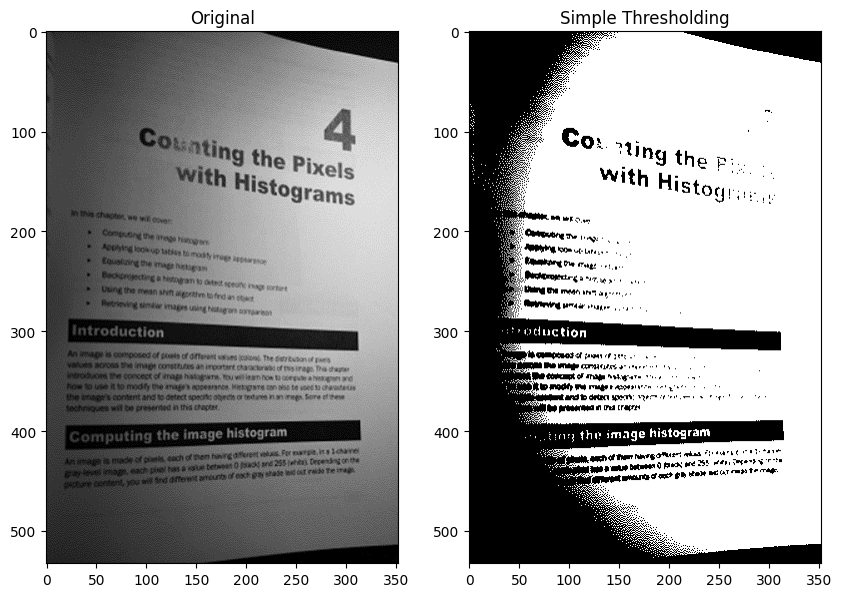

In [27]:
#Simple Thresholding
threshold , thresh =cv2.threshold(img4,75,255,cv2.THRESH_BINARY)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,7))
ax0.imshow(img4), ax0.set_title('Original')
ax1.imshow(thresh), ax1.set_title('Simple Thresholding')

(<matplotlib.image.AxesImage at 0x28be2e1cc50>,
 Text(0.5, 1.0, 'Simple Thresholding'))

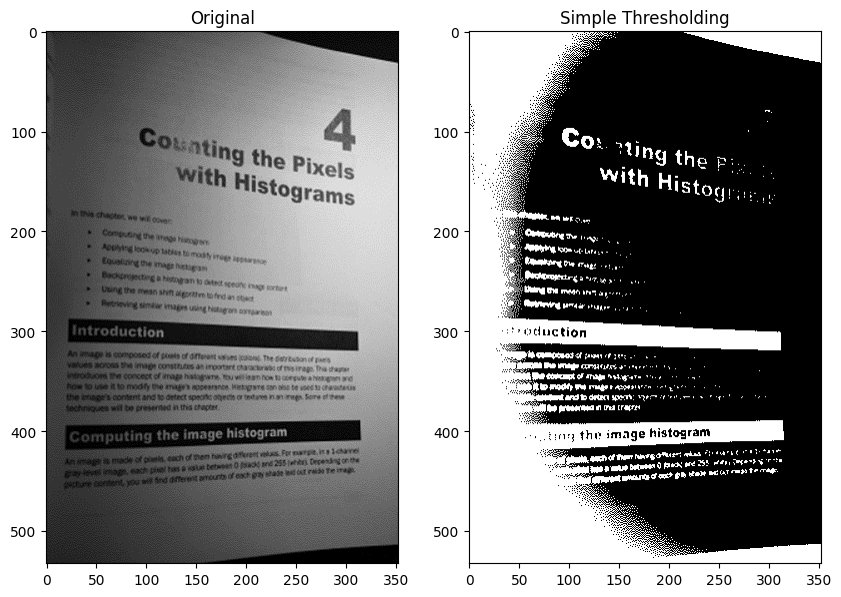

In [28]:
#Simple Thresholding
threshold , thresh2 =cv2.threshold(img4,75,255,cv2.THRESH_BINARY_INV)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,7))
ax0.imshow(img4), ax0.set_title('Original')
ax1.imshow(thresh2), ax1.set_title('Simple Thresholding')

In [8]:
#Adaptive Thresholding
adaptive_mean = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)

cv2.imshow("orignal", gray)
cv2.imshow("adaptive_mean", adaptive_mean)
cv2.waitKey(0)


-1

In [29]:
#Adaptive Thresholding
adaptive_guassin = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)

cv2.imshow("orignal", gray)
cv2.imshow("Adaptive Gaussian", adaptive_guassin)
cv2.waitKey(0)

-1

### Task 1.5: Using OpenCV, apply Kalman filter on the following video, to track and predict the trajectory of the red car, then display the video with the predicted trajectory.


In [9]:
class KalmanFilter:
    # Define the Kalman filter
    kf = cv2.KalmanFilter(4, 2)
    # Measurement matrix (relates measurements to the state)
    kf.measurementMatrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0]], np.float32)
    # Transition matrix (describing the dynamics of the system)
    kf.transitionMatrix = np.array([[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32)

    def predict(self, coordX, coordY):
        ''' This function estimates the position of the object'''
        measured = np.array([[np.float32(coordX)], [np.float32(coordY)]])
        self.kf.correct(measured)
        predicted = self.kf.predict()
        x, y = int(predicted[0]), int(predicted[1])
        return x, y

class RedDetector:
    def __init__(self):
        # Create mask for red color
        self.low_red = np.array([0, 100, 100])
        self.high_red = np.array([10, 255, 255])

    def detect(self, frame):
        hsv_img = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Create masks with color ranges
        mask = cv2.inRange(hsv_img, self.low_red, self.high_red)

        # Find Contours
        contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)

        box = (0, 0, 0, 0)
        for cnt in contours:
            (x, y, w, h) = cv2.boundingRect(cnt)
            box = (x, y, x + w, y + h)
            break

        return box

cap = cv2.VideoCapture("Media1.mp4")

# Load detector
rd = RedDetector()

# Load Kalman filter to predict the trajectory
kf = KalmanFilter()

while True:
    ret, frame = cap.read()
    if ret is False:
        break

    red_bbox = rd.detect(frame)
    x, y, x2, y2 = red_bbox
    cx = int((x + x2) / 2)
    cy = int((y + y2) / 2)

    predicted = kf.predict(cx, cy)
   
    cv2.circle(frame, (cx, cy), 75, (0, 0, 255), -1)
    cv2.circle(frame, (predicted[0], predicted[1]), 75, (255, 0, 0), 4)

    cv2.imshow("Frame", frame)
    key = cv2.waitKey(70)
    if key == 27:
        break
    
# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()

C:\Users\2023\AppData\Local\Temp\ipykernel_8348\1967429002.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x, y = int(predicted[0]), int(predicted[1])
